# Pré processa dados 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

CO_MUN = 3304557 # Rio de Janeiro
CO_UF_RIO = 33 # RJ

MIN_ALUNOS = 30 # Mínimo de alunos fazendo Enem para considerar na análise
NUM_MELHORES = 60

## Lendo dados do Enem do Rio de Janeiro

In [18]:
df_enem_rio = pd.concat(df_enem.loc[(df_enem.CO_UF_ESC== CO_UF_RIO) ] for df_enem in 
                        pd.read_csv('dados\microdados_enem2018\DADOS\MICRODADOS_ENEM_2018.csv', 
                                chunksize=10000, 
                                sep=';', encoding='iso8859-1'))
df_enem_rio.dropna(subset=['CO_ESCOLA'], inplace=True)
df_enem_rio['CO_ESCOLA'] = df_enem_rio.CO_ESCOLA.astype(int)
df_enem_rio.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
412,180008309665,2018,3304557,Rio de Janeiro,33,RJ,18.0,F,0.0,2,...,A,B,B,B,B,A,A,B,B,A
445,180008257113,2018,3304557,Rio de Janeiro,33,RJ,17.0,F,0.0,3,...,A,C,A,B,D,B,B,B,B,D
501,180008411523,2018,3302403,Macaé,33,RJ,17.0,F,0.0,1,...,A,C,A,A,E,B,D,B,B,A
505,180008202095,2018,3303708,Paraíba do Sul,33,RJ,17.0,M,0.0,1,...,A,B,A,A,C,B,B,B,B,C
522,180007766909,2018,3304557,Rio de Janeiro,33,RJ,22.0,F,0.0,3,...,B,C,A,A,E,B,C,B,B,A


In [19]:
df_enem_rio.shape

(102500, 137)

## Lendo censo de escolas

Alguns dados que parecem interessantes:

**TP_SITUACAO_FUNCIONAMENTO**	Situação de funcionamento	Num	1	1 - Em Atividade 2 - Paralisada 3 - Extinta (ano do Censo) 4 - Extinta em Anos Anteriores

TP_DEPENDENCIA	Dependência Administrativa	Num	1	1 - Federal 2 - Estadual 3 - Municipal 4 - Privada

TP_CATEGORIA_ESCOLA_PRIVADA	Categoria da escola privada	Num	1	1 - Particular 2 - Comunitária 3 - Confessional 4 - Filantrópica    - Não aplicável para escolas públicas

IN_MANT_ESCOLA_PRIVADA_EMP	Mantenedora da escola privada - Empresa, grupo empresarial do setor privado ou pessoa física

IN_MANT_ESCOLA_PRIVADA_ONG	Mantenedora da escola privada - Organização não governamental (ONG) - internacional ou nacional. Organização da Sociedade Civil de Interesse Público (Oscip)

IN_MANT_ESCOLA_PRIVADA_SIND	Mantenedora da escola privada - Sindicatos de trabalhadores ou patronais, associações e cooperativas

IN_MANT_ESCOLA_PRIVADA_SIST_S	Mantenedora da escola privada - Sistema S (Sesi, Senai, Sesc, Outros)

IN_MANT_ESCOLA_PRIVADA_S_FINS	Mantenedora da escola privada - Instituições sem fins lucrativos

QT_SALAS_EXISTENTES	Número de salas de aula existentes na escola	Num	4

QT_SALAS_UTILIZADAS	Número de salas utilizadas como salas de aula (dentro e fora do prédio)	Num	4

QT_FUNCIONARIOS	Total de funcionários da escola (inclusive profissionais escolares em sala de aula)

**IN_COMUM_MEDIO_MEDIO**	Escola oferece Ensino Médio - Médio Propedêutico em classes comuns do ensino regular (TP_ETAPA_ENSINO igual a 25,26,27,28 ou 29 e IN_ESPECIAL_EXCLUSIVA=0)	Num	1	0 - Não 1 - Sim


In [20]:
df_escolas = pd.read_csv('dados\microdados_educacao_basica_2018\microdados_ed_basica_2018\DADOS\ESCOLAS.zip', 
                         sep='|', 
                         encoding='latin1', 
                         low_memory=False, 
                         index_col='CO_ENTIDADE')\
               .query('CO_UF == @CO_UF_RIO and IN_COMUM_MEDIO_MEDIO==1 and TP_SITUACAO_FUNCIONAMENTO==1')
df_escolas


,NU_ANO_CENSO,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,
33018286,2018,CIEP 456 MARCO POLO,11013,1,01/02/2018,23/12/2018,3,3303,33005,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33018332,2018,CE DOUTOR VALMIR PECANHA,11013,1,01/02/2018,23/12/2018,3,3303,33005,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33018340,2018,CE MOACYR PADILHA,11013,1,01/02/2018,23/12/2018,3,3303,33005,33,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
33018359,2018,CE PROFESSOR KOPKE,11013,1,01/02/2018,23/12/2018,3,3303,33005,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33018367,2018,CE ROBERTO COELHO PEDROSO,11013,1,01/02/2018,23/12/2018,3,3303,33005,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33249202,2018,COLEGIO PH,11009,1,05/02/2018,20/12/2018,3,3306,33018,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33306206,2018,INSTITUTO RENNE DE ENSINO,11012,1,05/02/2018,05/12/2018,3,3302,33003,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33309205,2018,COLEGIO DE APLICACAO PROF JOSE DE SOUZA HERDY ...,11009,1,01/02/2018,19/12/2018,3,3306,33018,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
CO_SAO_VICENTE = 33063648
df_sv = df_enem_rio.loc[df_enem_rio.CO_ESCOLA == CO_SAO_VICENTE]
notas = list(filter(lambda x: 'NOTA' in x, df_sv.columns.to_list() ))
df_sv[notas].mean()

NU_NOTA_CN         597.308791
NU_NOTA_CH         675.223077
NU_NOTA_LC         633.967033
NU_NOTA_MT         727.627473
NU_NOTA_COMP1      159.120879
NU_NOTA_COMP2      164.615385
NU_NOTA_COMP3      158.241758
NU_NOTA_COMP4      165.714286
NU_NOTA_COMP5      150.989011
NU_NOTA_REDACAO    798.681319
dtype: float64

## Lê dados históricos de turmas 

In [22]:
primeiro_ano = [25,  30, 35]

In [23]:
import glob
import patoolib
import os.path

def dados_turma(ano, try_rar=True):
    dir_censo = [i for i in glob.glob(f'dados/*{ano}*') if ('censo' in i or 'educacao_basica' in i) and 'zip' not in i]
    assert len(dir_censo) == 1, f'Só pode ter achado um arquivo e achou {len(dir_censo)}'

    arquivo_turmas = glob.glob(f'{dir_censo[0]}/*{ano}*/DADOS/TURMAS.*')
    if not arquivo_turmas:
        arquivo_turmas = glob.glob(f'{dir_censo[0]}/DADOS/TURMAS.*')
    
    result = [i for i in arquivo_turmas if i.lower().endswith('.csv')]
    if not result:
        result = [i for i in arquivo_turmas if i.lower().endswith('.zip')]
        if try_rar and not result:
            rar = [i for i in arquivo_turmas if i.lower().endswith('.rar')]
            if rar:
                patoolib.extract_archive(rar[0], outdir=os.path.dirname(rar[0]))
                result = dados_turma(ano, False)
                
    if result:
        result = result[0]
    else:
        result = None
    return result

for i in range(2007, 2019):
    print(">", dados_turma(i))
#estrutura diretórios bagunçados anets de 2007

> dados\micro_censo_escolar_2007\2007\DADOS\TURMAS.CSV
> dados\micro_censo_escolar_2008\2008\DADOS\TURMAS.CSV
> dados\micro_censo_escolar_2009\2009\DADOS\TURMAS.CSV
> dados\micro_censo_escolar_2010\2010\DADOS\TURMAS.CSV
> dados\micro_censo_escolar_2011\2011\DADOS\TURMAS.CSV
> dados\micro_censo_escolar_2012\2012\DADOS\TURMAS.CSV
> dados\micro_censo_escolar_2013\2013\DADOS\TURMAS.CSV
> dados\micro_censo_escolar_2014\2014\DADOS\TURMAS.CSV
> dados\micro_censo_escolar_2015\2015\DADOS\TURMAS.CSV
> dados\micro_censo_escolar_2016\micro_censo_escolar_2016\DADOS\TURMAS.CSV
> dados\micro_censo_escolar_2017\Microdados_Censo_Escolar_2017\DADOS\TURMAS.zip
> dados\microdados_educacao_basica_2018\microdados_ed_basica_2018\DADOS\TURMAS.CSV


In [24]:
col_turmas = pd.DataFrame({
    'id_etapa':       ['category', 'FK_COD_ETAPA_ENSINO',  'TP_ETAPA_ENSINO', 'TP_ETAPA_ENSINO', ],
    'id_escola':      ['category', 'PK_COD_ENTIDADE',      'CO_ENTIDADE',     'CO_ENTIDADE',     ],
    'num_matriculas': ['uint8',    'NUM_MATRICULAS',       'NU_MATRICULAS',   'QT_MATRICULAS',   ], 
    'id_municipio':   ['category', 'FK_COD_MUNICIPIO',     'CO_MUNICIPIO',    'CO_MUNICIPIO',    ],
    'id_uf':          ['category', 'FK_COD_ESTADO',        'CO_UF',           'CO_UF',           ],
    #'is_eja':         ['boolean',  'IN_EJA',               'IN_EJA',          'IN_EJA',          ],

    }, index=[         'dtype',    '2007',                 '2015',            '2018', ])
def colunas_turmas(columns):
    columns = set(columns)
    match = col_turmas.applymap(columns.__contains__).all(axis=1)
    assert match.sum()==1, f"Um e somente um registro de nomes de colunas deveria "\
                           f"casar com todas as colunas dos dados lidos de disco {str(columns)}\n" \
                           f"\n{match}"
    colunas_map = col_turmas[match].iloc[0].to_dict()
    return colunas_map

In [25]:
def mapa_de_colunas(ano):
    df_teste = pd.read_csv(
            dados_turma(ano),
            sep="|",
            encoding="latin1",
            nrows=1
        )
    map_colunas = colunas_turmas(df_teste.columns)
    
    return {v:k for k,v in map_colunas.items()}
#mapa_de_colunas(2014), mapa_de_colunas(2015)

In [26]:
def le_turma(ano):
    print(f"Lendo ano {ano}")
    map_colunas = mapa_de_colunas(ano)
    df_t = pd.concat((
        df_t#.rename(columns=map_colunas).query('id_etapa.isin(@primeiro_ano) and id_uf == @CO_MUN_RIO')\
            #.merge(escolas, left_on='id_escola', right_on='CO_ENTIDADE')
        for df_t in pd.read_csv(
            dados_turma(ano),
            sep="|",
            encoding="latin1",
            chunksize=1000, 
            #error_bad_lines=False,
            usecols=map_colunas.keys(),
            #nrows=100 #debug
        )), 
        sort=True
    )
    df_t['ano'] = ano
    return df_t
    
# df_primeiro_ano_turmas = pd.concat(
#     (le_turma(i, df_escolas.CO_ENTIDADE, primeiro_ano) for i in range(2007, 2019)), #2007 e 2008, 2009 falharam linhas diferentes
#     sort=True)
# print(df_primeiro_ano_turmas.shape)
# df_primeiro_ano_turmas.head()
def le_tudo():
    for i in range(2015, 2019):
        print(f"Turmas ano {i}")
        le_turma(i)
#le_tudo()        

In [27]:
def le_turmas_padronizadas(filtro, range_ = None):
    if not range_: 
        range_ = range(2007, 2019)
        
    return pd.concat(
        [le_turma(i)\
          .rename(columns=mapa_de_colunas(i))\
          .astype(col_turmas.loc['dtype'].to_dict()) #precisa do to_dict?
          .query(filtro)
          .assign(ano=i)
         for i in range_
        ], sort=True
    )

In [28]:
df = le_turmas_padronizadas('id_escola==33063729 ', [2015, 2016, 2017, 2018])

Lendo ano 2015
Lendo ano 2016
Lendo ano 2017
Lendo ano 2018


In [29]:
df[df.id_etapa==27].sum()


ano                   48396.0
id_escola         793529496.0
id_etapa                648.0
id_municipio       79309368.0
id_uf                   792.0
num_matriculas          901.0
dtype: float64

In [30]:
                         
df_primeiro_ano_turmas = le_turmas_padronizadas('id_etapa.isin(@primeiro_ano) and id_uf == @CO_UF_RIO')
print(df_primeiro_ano_turmas.shape)
df_primeiro_ano_turmas.head()

Lendo ano 2007
Lendo ano 2008
Lendo ano 2009
Lendo ano 2010
Lendo ano 2011
Lendo ano 2012
Lendo ano 2013
Lendo ano 2014
Lendo ano 2015
Lendo ano 2016
Lendo ano 2017
Lendo ano 2018
(92500, 6)


,ano,id_escola,id_etapa,id_municipio,id_uf,num_matriculas
6930,2007,33015279,25.0,3302403,33,30
6952,2007,33015279,25.0,3302403,33,32
7044,2007,33055653,25.0,3303302,33,37
7045,2007,33055653,25.0,3303302,33,34
7046,2007,33055653,25.0,3303302,33,34


## Grava tudo em formato binário em disco

In [31]:
#df_turmas.reset_index().to_feather('dados/turmas2018.feather')
df_enem_rio.reset_index().to_feather('dados/enem_rio_2018.feather')

In [32]:
df_escolas.reset_index().to_feather('dados/escolas_rio_2018.feather')

In [38]:
df_primeiro_ano_turmas.reset_index().to_feather('dados/primeiro_ano.feather')

## EJA

In [39]:
eja_etapas = set(range(43, 75))
# ((65,67,69,70,71,72,73, 74) + # etapas 2015 em diante
#               (43, 44, 45, 46, 47, 48, 51, 58, 60, 61, 62, 63, 65, ) +# eja 2014 para trás
#               (49, 50, 51, 52, 53, 54, 55, 56, 57, 58) #achei em 2007
#              )

df_eja = le_turmas_padronizadas('id_etapa.isin(@eja_etapas) and id_uf == @CO_UF_RIO')

Lendo ano 2007
Lendo ano 2008
Lendo ano 2009
Lendo ano 2010
Lendo ano 2011
Lendo ano 2012
Lendo ano 2013
Lendo ano 2014
Lendo ano 2015
Lendo ano 2016
Lendo ano 2017
Lendo ano 2018


In [40]:
df_eja_escola = df_eja.groupby(['id_escola', 'ano'])['num_matriculas'].sum()

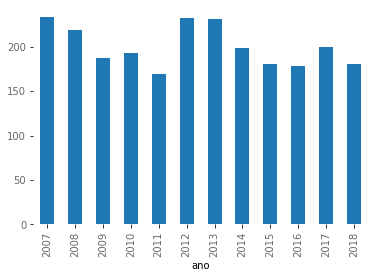

In [41]:
ax = df_eja_escola[CO_SAO_VICENTE].plot.bar()
plt.xticks(alpha=.6)
plt.yticks(alpha=.6)
plt.box(False)
ax.tick_params(labelbottom='off')#não desligou

In [54]:
df_eja_svp = df_eja[df_eja.id_escola==CO_SAO_VICENTE].groupby(['id_escola', 'ano']).agg(num_turmas=('num_matriculas', 'count'), total_matriculas=('num_matriculas', 'sum'))
df_eja_svp['rank'] = df_eja_svp.total_matriculas.rank(method="min").astype('int')
df_eja_svp.index = df_eja_svp.index.droplevel(0)
df_eja_svp

,num_turmas,total_matriculas,rank
ano,,,
2007,9,233,12
2008,10,219,9
2009,10,187,5
2010,10,193,6
2011,10,169,1
2012,11,232,11
2013,13,231,10
2014,13,198,7
2015,13,181,3


In [ ]:
with pd.option_context('display.max_rows', None):
    display(df_eja[df_eja.id_escola==CO_SAO_VICENTE])